/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['a', 'b', 'c', 'd'])
/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['e', 'f', 'g', 'h'])


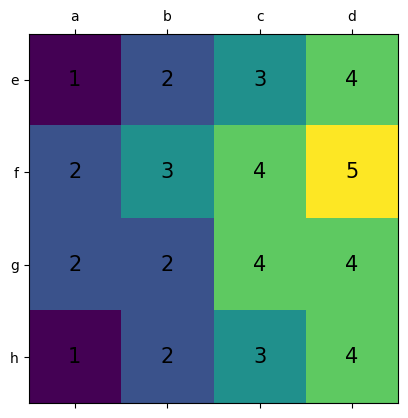

/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:252: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['insert', 'fairness', 'notions', 'here'])
/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['No Missing', 'MCAR', 'MAR', 'NMAR'])


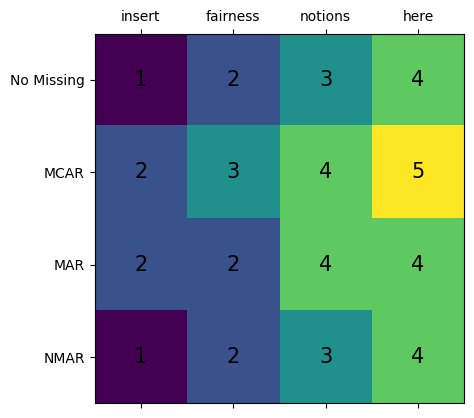

pip install 'aif360[LawSchoolGPA]'


In [ ]:
import pandas as pd
import os
import sys
from src.cleaning import datacleaning
from src import data_generation
from src.preparation import model_perform
import pandas as pd
import numpy as np
import aif360
from sklearn.model_selection import train_test_split
from aif360.sklearn.metrics import statistical_parity_difference
from aif360.sklearn.metrics import average_odds_difference
from aif360.sklearn.metrics import equal_opportunity_difference

In [ ]:
data = datacleaning.cleaning(os.path.join(os.path.dirname(
    os.path.realpath('run.py')) + '/data/allegations_raw.csv'))

In [ ]:
target = sys.argv[1]

if target == "test":
    data = datacleaning.cleaning(os.path.join(os.path.dirname(
        os.path.realpath('run.py')) + '/data/test.csv'))

if target == "all":
    data = datacleaning.cleaning(os.path.join(os.path.dirname(
        os.path.realpath('run.py')) + '/data/allegations_raw.csv'))

In [ ]:
data.isna().sum()

In [ ]:
data.head()

In [ ]:
train, test = train_test_split(data, train_size=0.8)

## Missingness Creation

We want the attribute with missingness to have around the same proportion of missingness for each type. This is because we don't want the amount of missingness to be a confounding factor in our results.

In [ ]:
t = train.copy()
mcar = data_generation.mcar(t, 'substantiated')

In [ ]:
mcar['substantiated'].isna().sum() / mcar.shape[0]

In [ ]:
mcar = mcar.dropna(subset = 'substantiated')

In [ ]:
t = train.copy()
mar = data_generation.mar(t, 'substantiated', 'complainant_gender', 0.3)

In [ ]:
mar['substantiated'].isna().sum() / mar.shape[0]

In [ ]:
mar = mar.dropna(subset = 'substantiated')

In [ ]:
t = train.copy()
nmar = data_generation.nmar(t, 'substantiated', 0.3)

In [ ]:
nmar['substantiated'].isna().sum() / nmar.shape[0]

In [ ]:
nmar = nmar.dropna(subset = 'substantiated')

Now we will "handle" the missingness by dropping missing values.

## Applying Fairness Notions


In [ ]:
cats = ["allegation", "contact_reason"]

### Calculating fairnes notions for No Missingness At All

In [ ]:
#storing fairness notions for no missingness
no_missing_results = model_perform.model(train, test, cats)

### Fairness notions for NMAR

In [ ]:
nmar_results = model_perform.model(nmar, test, cats)

### Fairness notions for MCAR

In [ ]:
mcar_results = model_perform.model(mcar, test, cats)

### Fairness notions for MAR

In [ ]:
mar_results = model_perform.model(mar, test, cats)

In [ ]:
#put our fairness statistics into arrays for future usage
acc = [no_missing_results[0],nmar_results[0],mcar_results[0],mar_results[0]]
par= [no_missing_results[1],nmar_results[1],mcar_results[1],mar_results[1]]
odds= [no_missing_results[2],nmar_results[2],mcar_results[2],mar_results[2]]
opp = [no_missing_results[3],nmar_results[3],mcar_results[3],mar_results[3]]

## Visualizing Our Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labels = ['No Missingess,', 'NMAR', 'MCAR', 'MAR']

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Statistical Parities')
plt.xlabel('Missingness Type')
plt.ylabel('Statistical Parotities')
plt.ylim(min(par) - 0.1, max(par) + 0.1)
plt.plot(labels, par, marker='.', markersize = 20)

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Equality of Odds')
plt.xlabel('Missingness Type')
plt.ylabel('Equality of Odds')
plt.ylim(min(odds)-0.1,max(odds) + 0.1)
plt.plot(labels, odds, marker='.', markersize = 20)

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Equality of Opportunity')
plt.xlabel('Missingness Type')
plt.ylabel('Equality of Opportunity')
plt.ylim(min(opp)-0.1,max(opp) + 0.1)
plt.plot(labels, opp, marker='.', markersize = 20)

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Accuracies')
plt.xlabel('Missingness Type')
plt.ylabel('Accuracies')
plt.ylim(min(acc)-0.1,max(acc) + 0.1)
plt.plot(labels, acc, marker='.', markersize = 20)